In [2]:
import pandas as pd
from database.market import Market
from database.sec import SEC
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
from processor.processor import Processor as p
import re

In [6]:
sec = SEC()

In [3]:
market = Market()
market.connect()
sp5 = market.retrieve("sp500")
market.disconnect()

In [4]:
year = 2022
quarter = 2

In [7]:
market.connect()
sec.connect()
for ticker in tqdm(sp5["Symbol"][:1]):
    try:
        cik = sp5[sp5["Symbol"]==ticker]["CIK"].item()
        filings = sec.retrieve_filing_data(int(cik))
        filings.fillna(0,inplace=True)
        stuff = {}
        for col in filings.columns:
            simplified = re.findall('[A-Z][^A-Z]*',col)
            new_col = "".join(simplified[:3])
            if new_col in stuff.keys():
                stuff[new_col].append(col)
            else:
                stuff[new_col] = []
                stuff[new_col].append(col)
        valid_cols = []
        for key in list(stuff.keys())[1:]:
            try:
                filings[key] = [sum([row[1][subkey] for subkey in stuff[key]]) for row in filings.iterrows()]
                valid_cols.append(key)
            except Exception as e:
                print(str(e))
        aggregated_filings = filings[valid_cols]
        aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]    
        complete_cols = []
        for col in aggregated_filings.columns:
            if len([x for x in aggregated_filings[col] if x == 0.00]) / aggregated_filings.index.size < 0.1:
                complete_cols.append(col)
        stock_price = market.retrieve_ticker_prices("prices",ticker)
        stock_price = p.column_date_processing(stock_price)
        stock_price.dtypes
        stock_price["year"] = [x.year for x in stock_price["date"]]
        stock_price["quarter"] = [x.quarter for x in stock_price["date"]]
        stock_price = stock_price.groupby(["year","quarter"]).mean().reset_index()
        aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
        aggregated_filings["quarter"] = [x.quarter for x in aggregated_filings["date"]]
        ds = aggregated_filings.merge(stock_price[["year","quarter","adjclose"]],on=["year","quarter"])
        ds["ticker"] = ticker
        ds = ds[(ds["year"]==year) & (ds["quarter"]==quarter)]
        market.store("cfa_filings",ds)
    except Exception as e:
        print(str(e))
market.disconnect()
sec.disconnect()

  0%|                                                  | 0/503 [00:00<?, ?it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

  2%|▋                                         | 8/503 [00:06<07:01,  1.17it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

  4%|█▊                                       | 22/503 [00:20<07:52,  1.02it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

  6%|██▎                                      | 28/503 [00:25<06:51,  1.16it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

  7%|██▊                                      | 34/503 [00:34<10:18,  1.32s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

  8%|███▎                                     | 40/503 [00:39<06:33,  1.18it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

  9%|███▋                                     | 46/503 [00:45<07:35,  1.00it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 10%|████▏                                    | 52/503 [00:51<07:52,  1.05s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 12%|████▋                                    | 58/503 [00:56<05:33,  1.34it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
 12%|████▊                                    | 59/503 [00:57<05:43,  1.29it/s]

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 14%|█████▊                                   | 71/503 [01:10<08:29,  1.18s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 15%|██████▎                                  | 77/503 [01:17<09:38,  1.36s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 19%|███████▊                                 | 96/503 [01:34<06:32,  1.04it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 20%|████████                                | 102/503 [01:40<06:58,  1.04s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 21%|████████▌                               | 108/503 [01:46<06:15,  1.05it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 23%|█████████                               | 114/503 [01:52<06:57,  1.07s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 24%|█████████▊                              | 123/503 [02:01<06:52,  1.08s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 27%|██████████▉                             | 137/503 [02:13<04:55,  1.24it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 28%|███████████▎                            | 143/503 [02:19<05:31,  1.09it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 30%|████████████                            | 151/503 [02:27<05:55,  1.01s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 31%|████████████▍                           | 157/503 [02:33<06:32,  1.13s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 32%|████████████▉                           | 163/503 [02:40<05:26,  1.04it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 34%|█████████████▍                          | 169/503 [02:46<05:43,  1.03s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 35%|█████████████▉                          | 176/503 [02:55<06:54,  1.27s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 36%|██████████████▍                         | 182/503 [03:01<05:05,  1.05it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 37%|██████████████▉                         | 188/503 [03:11<07:47,  1.48s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

'filed'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 40%|████████████████▏                       | 203/503 [03:24<04:49,  1.04it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 42%|████████████████▌                       | 209/503 [03:28<03:16,  1.49it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 44%|█████████████████▍                      | 220/503 [03:42<05:44,  1.22s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 45%|█████████████████▉                      | 226/503 [03:50<05:44,  1.24s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 46%|██████████████████▍                     | 232/503 [03:56<04:28,  1.01it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 47%|██████████████████▉                     | 238/503 [04:03<05:21,  1.21s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 49%|███████████████████▍                    | 244/503 [04:10<04:33,  1.06s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 50%|███████████████████▉                    | 250/503 [04:14<03:18,  1.27it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 51%|████████████████████▎                   | 256/503 [04:20<03:34,  1.15it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 53%|█████████████████████▏                  | 267/503 [04:31<05:00,  1.27s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 55%|██████████████████████                  | 278/503 [04:45<04:29,  1.20s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 56%|██████████████████████▌                 | 284/503 [04:51<04:11,  1.15s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 58%|███████████████████████                 | 290/503 [04:57<03:50,  1.08s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 59%|███████████████████████▌                | 296/503 [05:03<03:33,  1.03s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 60%|████████████████████████                | 302/503 [05:10<03:43,  1.11s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 66%|██████████████████████████▎             | 331/503 [05:38<02:57,  1.03s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 67%|██████████████████████████▊             | 337/503 [05:44<02:36,  1.06it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 70%|███████████████████████████▊            | 350/503 [05:57<02:00,  1.27it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 71%|████████████████████████████▎           | 356/503 [06:02<01:33,  1.57it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 73%|█████████████████████████████▎          | 368/503 [06:11<02:04,  1.09it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 74%|█████████████████████████████▋          | 374/503 [06:18<02:36,  1.21s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 76%|██████████████████████████████▏         | 380/503 [06:24<02:14,  1.10s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 77%|██████████████████████████████▋         | 386/503 [06:32<02:05,  1.07s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 78%|███████████████████████████████▎        | 394/503 [06:41<02:16,  1.25s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 80%|███████████████████████████████▊        | 400/503 [06:48<01:58,  1.15s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 81%|████████████████████████████████▎       | 407/503 [06:53<01:17,  1.23it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 82%|████████████████████████████████▊       | 413/503 [07:01<02:26,  1.63s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

'filed'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 84%|█████████████████████████████████▋      | 424/503 [07:13<01:53,  1.43s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 86%|██████████████████████████████████▍     | 433/503 [07:21<01:02,  1.12it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 87%|██████████████████████████████████▉     | 439/503 [07:25<00:51,  1.25it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 88%|███████████████████████████████████▍    | 445/503 [07:31<00:52,  1.10it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 90%|███████████████████████████████████▊    | 451/503 [07:36<00:45,  1.13it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 91%|████████████████████████████████████▎   | 457/503 [07:44<00:59,  1.28s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 92%|████████████████████████████████████▊   | 463/503 [07:49<00:38,  1.04it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

 93%|█████████████████████████████████████▎  | 469/503 [07:54<00:34,  1.01s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

market cfa_filings documents must be a non-empty list


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 97%|██████████████████████████████████████▊ | 488/503 [08:15<00:18,  1.24s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["year"] = [x.year for x in aggregated_filings["date"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:37: SettingWithCopyWarning: 
A value is trying to be set on 

 99%|███████████████████████████████████████▊| 500/503 [08:27<00:03,  1.00s/it]C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
100%|███████████████████████████████████████▊| 501/503 [08:28<00:01,  1.03it/s]

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
100%|███████████████████████████████████████▉| 502/503 [08:30<00:01,  1.49s/it]

'date'


C:\Users\eric\AppData\Local\Temp/ipykernel_9336/1994381946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_filings["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in filings["filed"]]
100%|████████████████████████████████████████| 503/503 [08:31<00:00,  1.02s/it]

'date'


In [8]:
ds

,AccountsNotesAnd,AccountsPayableCurrent,AccountsReceivableGross,AccountsReceivableNet,AccruedIncomeTaxes,AccruedLiabilitiesCurrent,AccumulatedBusinessExit,AccumulatedDepreciationDepletion,AccumulatedOtherComprehensive,AccumulatedOtherRestructuring,...,NumberOfReceivables,FinitelivedIntangibleAssets,PurchaseObligation,PurchaseObligationDue,InvestmentIncomeInterest,date,year,quarter,adjclose,ticker
44,0.0,695500000.0,0.0,780000000.0,40500000.0,549000000.0,0.0,0.0,-29000000.0,0.0,...,0.0,0.0,0.0,0.0,16000000.0,2022-05-03,2022,2,355.264444,ZBRA


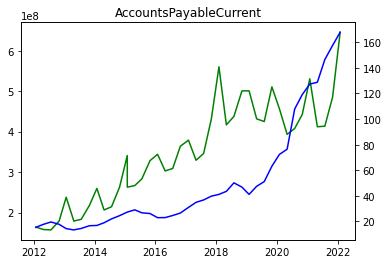

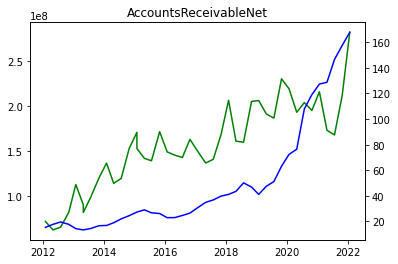

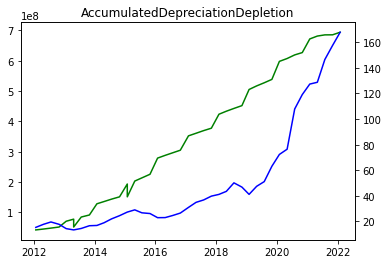

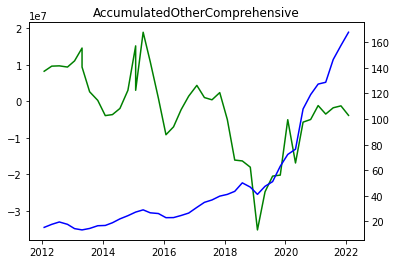

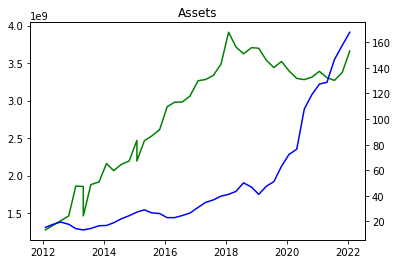

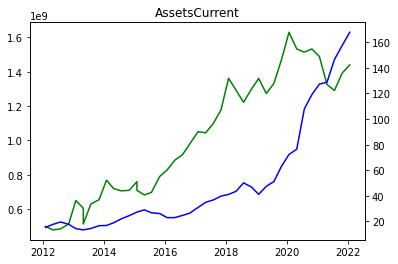

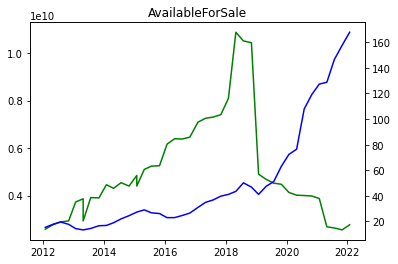

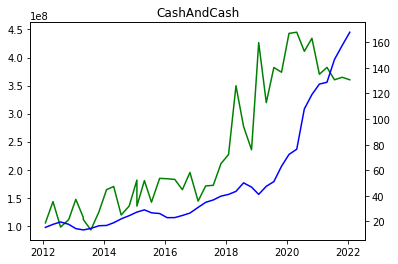

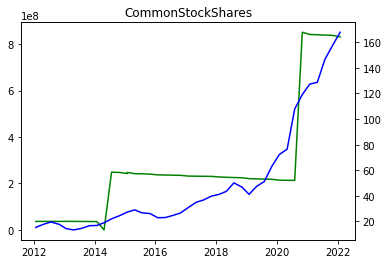

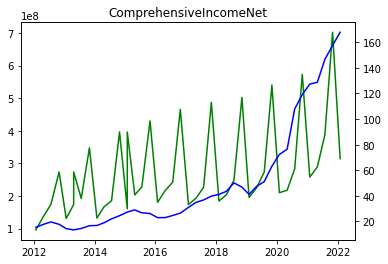

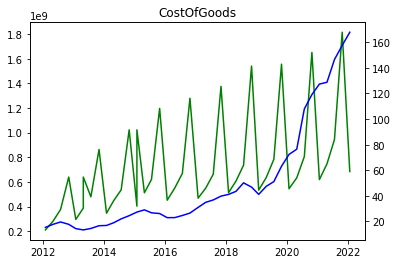

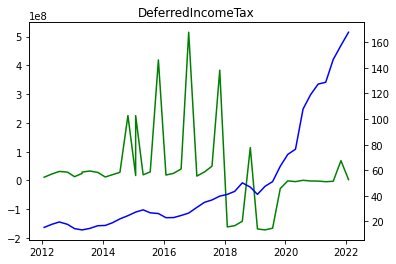

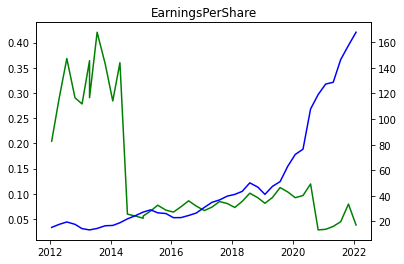

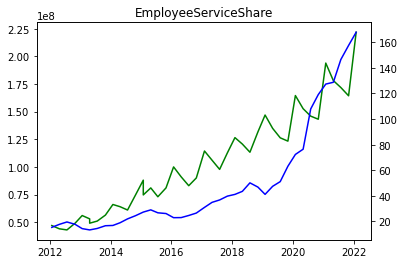

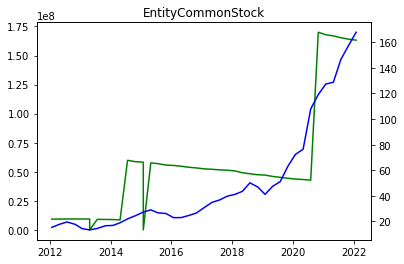

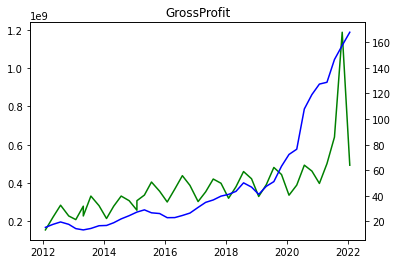

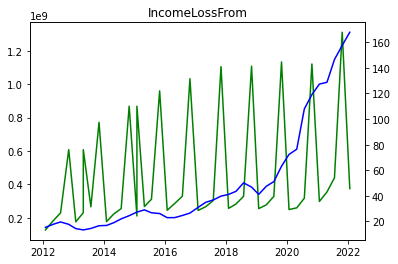

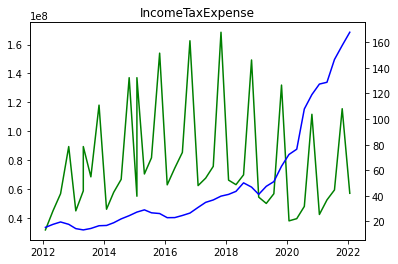

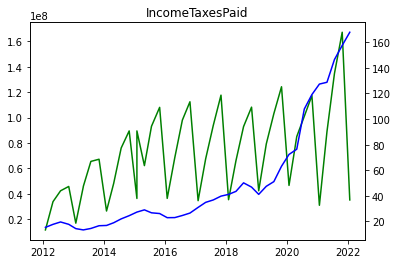

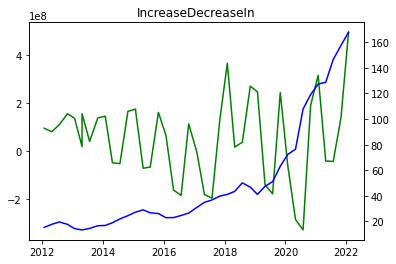

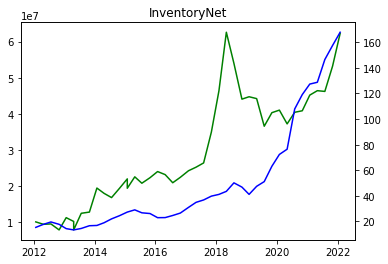

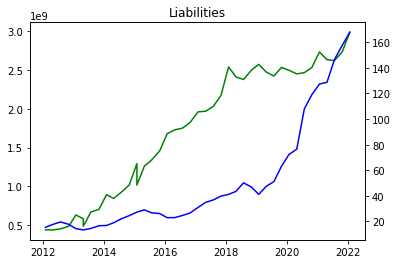

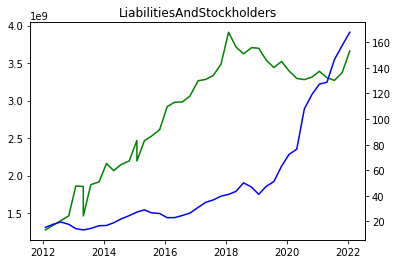

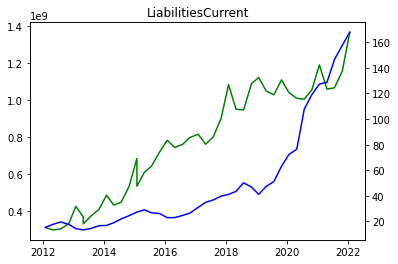

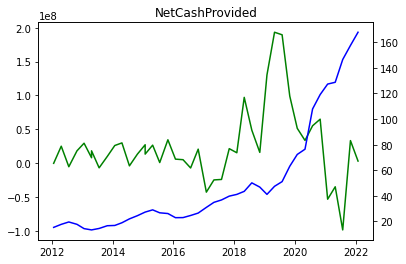

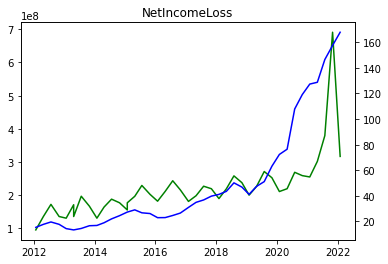

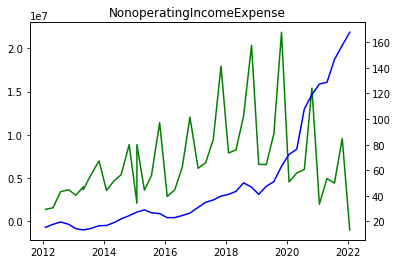

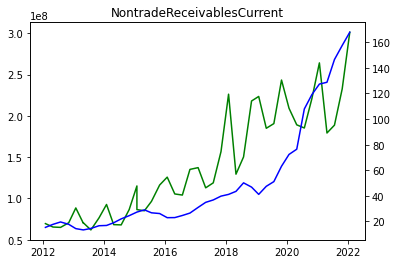

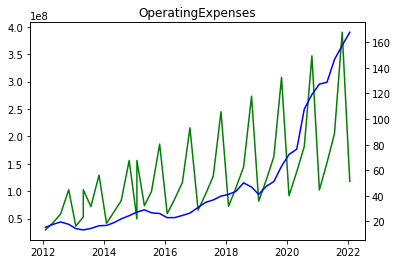

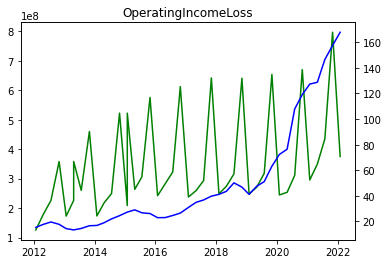

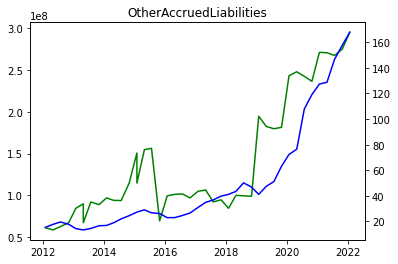

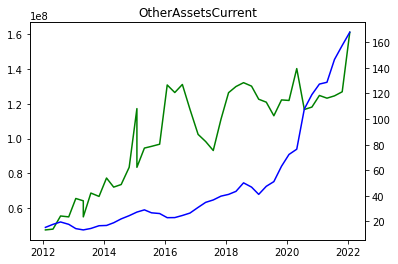

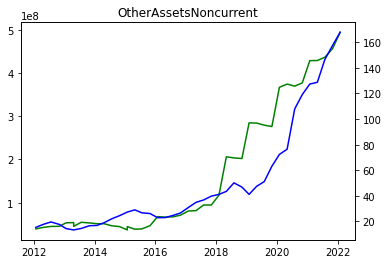

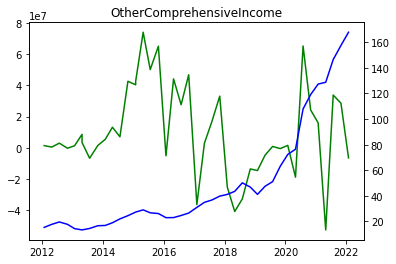

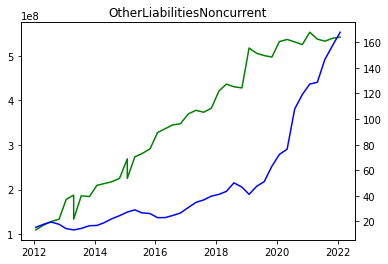

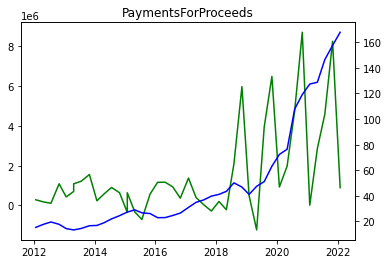

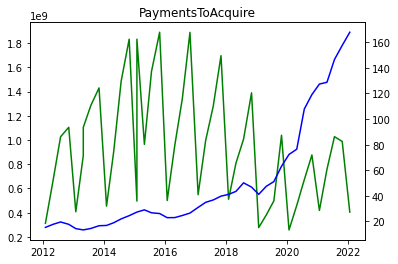

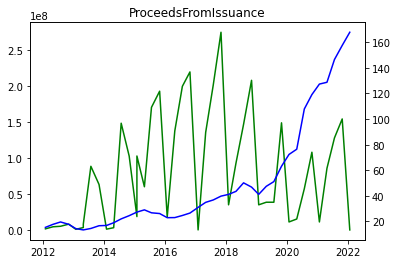

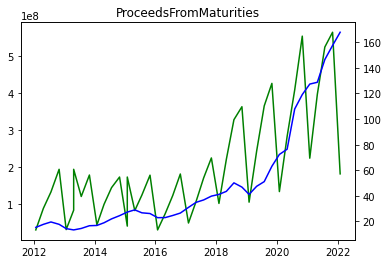

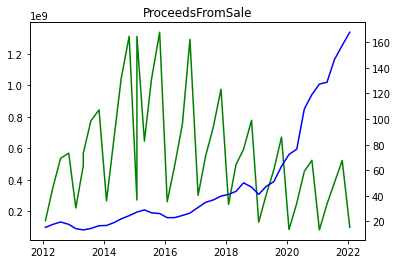

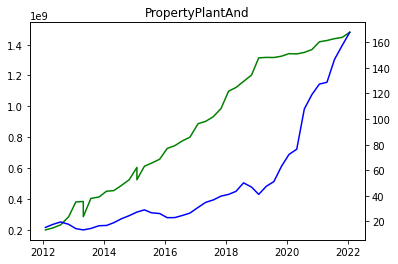

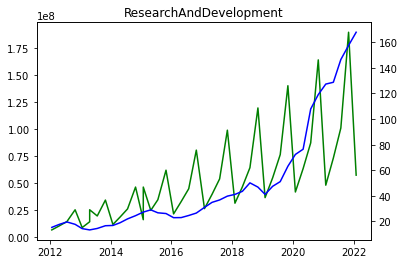

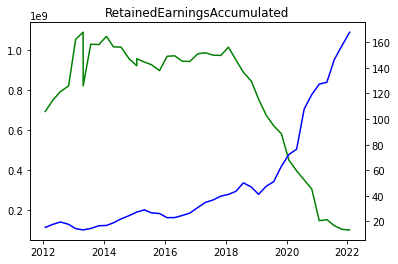

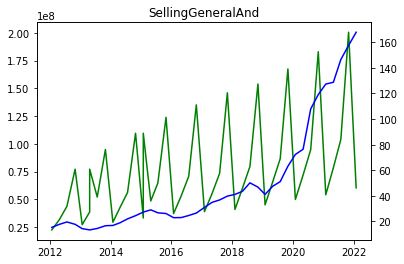

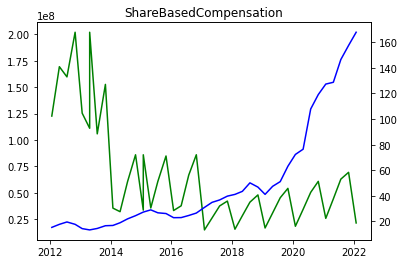

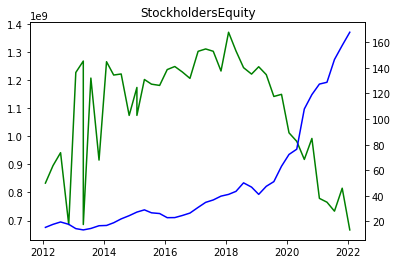

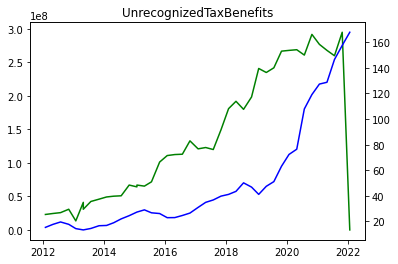

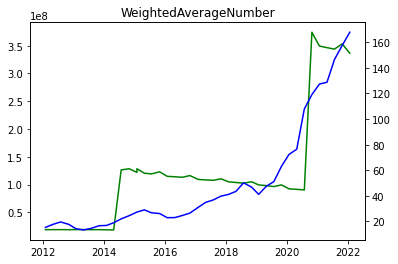

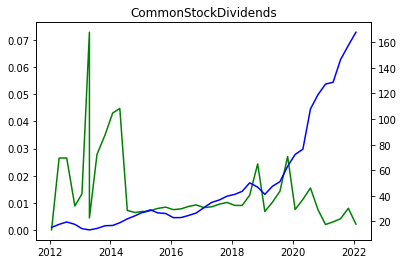

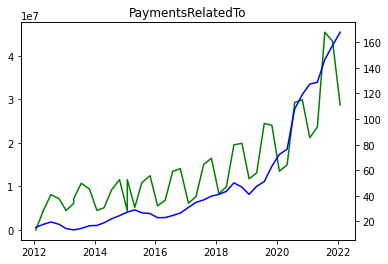

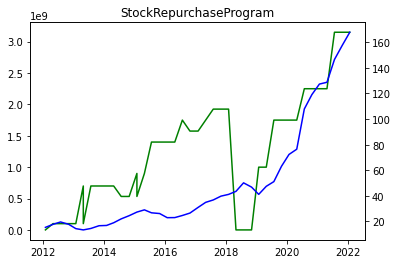

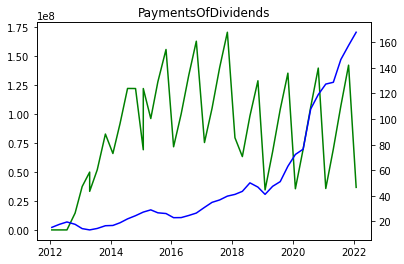

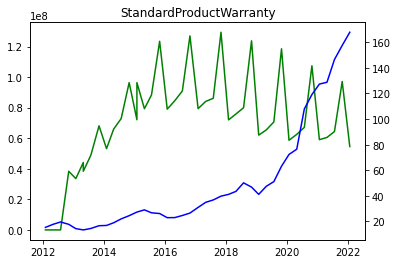

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [98]:
for col in complete_cols:
    x = ds["date"]
    y1 = ds[col]/100
    y2 = ds["adjclose"]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(x, y1, 'g-')
    ax2.plot(x, y2, 'b-')
    plt.title(col)
    plt.show()